In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
v1 = [6.2,7.81,9.43,11.2,15.27,14,15.1,17.2,19.4,20.7]
i1 = [0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]
v2 = [28.93,41.2,14.3,17.6,11.1,10.3,7.54,22.08,8.27,10.5]
i2 = [0.7,1,0.34,0.45,0.28,0.25,0.19,0.56,0.21,0.27]
v3 = [3.33,3.28,3.13,3.15,3.11,3.1,3.09,3.18,3.09,3.08]
i3 = [0.408,0.396,0.389,0.386,0.381,0.38,0.378,0.39,0.379,0.377]

In [109]:
len(v2)

10

In [40]:
import scipy
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()

In [83]:
si1 = np.array(i1).reshape(-1,1)
sv1 = np.array(v1)
regr.fit(si1,sv1)
sv1_pred = regr.predict(si1)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error:",regr.score(si1, sv1))

Coefficients: 
 [7.90636364]
Independent term: 
 0.980818181818174
Mean squared error: 0.9656074633491204


In [69]:
print(sv1,sv1_pred)

[ 6.2   7.81  9.43 11.2  15.27 14.   15.1  17.2  19.4  20.7 ] [ 6.51527273  8.09654545  9.67781818 11.25909091 12.84036364 14.42163636
 16.00290909 17.58418182 19.16545455 20.74672727]


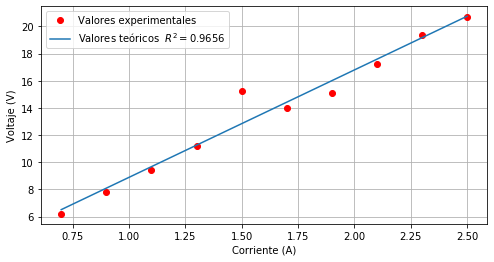

In [102]:
plt.figure(figsize=(8,4))
plt.plot(i1,v1,'or')
plt.plot(si1,sv1_pred)
plt.grid(True)
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje (V)")
plt.legend(('Valores experimentales','Valores teóricos $\;R^{2} = 0.9656$'))
plt.savefig('dat1.pdf')

In [84]:
si2 = np.array(i2).reshape(-1,1)
sv2 = np.array(v2)
regr.fit(si2,sv2)
sv2_pred = regr.predict(si2)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error:",regr.score(si2, sv2))

Coefficients: 
 [41.44983182]
Independent term: 
 -0.43417852161785575
Mean squared error: 0.9984214567866163


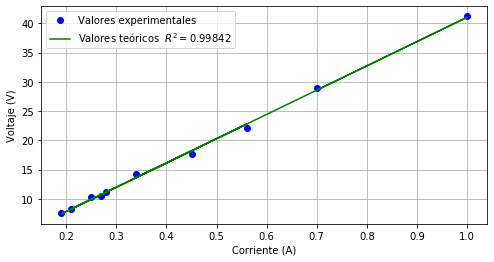

In [99]:
plt.figure(figsize=(8,4))
plt.plot(i2,v2,'ob')
plt.plot(si2,sv2_pred,'-g')
plt.grid(True)
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje (V)")
plt.legend(('Valores experimentales','Valores teóricos $\;R^{2} = 0.99842$'))
plt.savefig('dat2.pdf')

In [85]:
si3 = np.array(i3).reshape(-1,1)
sv3 = np.array(v3)
regr.fit(si3,sv3)
sv3_pred = regr.predict(si3)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error:",regr.score(si3, sv3))

Coefficients: 
 [8.5041744]
Independent term: 
 -0.13201298701298914
Mean squared error: 0.9359185928545816


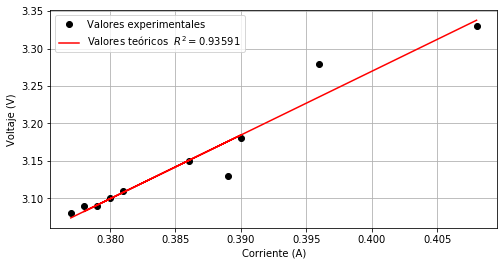

In [101]:
plt.figure(figsize=(8,4))
plt.plot(i3,v3,'ok')
plt.plot(si3,sv3_pred,'r')
plt.grid(True)
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje (V)")
plt.legend(('Valores experimentales','Valores teóricos $\;R^{2} = 0.93591$'))
plt.savefig('dat3.pdf')

In [117]:
(sv1_pred[0] - v1[0])/(v1[0])

0.05085043988269685

In [119]:
error1 = []
error2 = []
error3 = []
for i in range(0,len(v1)):
    error1.append(abs(sv1_pred[i]-v1[i])/v1[i] * 100)
    error2.append(abs(sv2_pred[i]-v2[i])/v2[i] * 100)
    error3.append(abs(sv3_pred[i]-v3[i])/v3[i] * 100)

In [120]:
print(error1,error2,error3)

[5.085043988269685, 3.668955884064655, 2.6279764773931817, 0.5275974025973669, 15.911174614514522, 3.0116883116882827, 5.979530403371429, 2.23361522198732, 1.208997188378631, 0.22573561703995523] [1.2073842057305777, 0.44744346127773377, 4.48416576450049, 3.512760201075483, 0.6466160967760849, 3.608937550728148, 1.309157515375121, 3.159996807527843, 0.0034602134479425175, 2.4502482722517134] [0.23093594522166122, 1.3524367618444075, 1.4731902055042403, 0.01899461083135961, 0.06181806250706314, 0.013765036806504788, 0.24061698818979022, 0.1451266612991754, 0.03459901171415064, 0.1928324458472746]


In [122]:
import pandas as pd
df = pd.DataFrame(list(zip(v1,sv1_pred,error1,v2,sv2_pred,error2,v3,sv3_pred,error3)),index = ['1','2','3','4','5','6','7','8','9','10'],columns=['Voltaje real 1','Voltaje teórico 1','Error 1 (%)','Voltaje real 2','Voltaje teórico 2','Error 2 (%)','Voltaje real 3','Voltaje teórico 3','Error 3 (%)'])

In [123]:
df

,Voltaje real 1,Voltaje teórico 1,Error 1 (%),Voltaje real 2,Voltaje teórico 2,Error 2 (%),Voltaje real 3,Voltaje teórico 3,Error 3 (%)
1,6.20,6.515273,5.085044,28.93,28.580704,1.207384,3.33,3.337690,0.230936
2,7.81,8.096545,3.668956,41.20,41.015653,0.447443,3.28,3.235640,1.352437
3,9.43,9.677818,2.627976,14.30,13.658764,4.484166,3.13,3.176111,1.473190
4,11.20,11.259091,0.527597,17.60,18.218246,3.512760,3.15,3.150598,0.018995
5,15.27,12.840364,15.911175,11.10,11.171774,0.646616,3.11,3.108077,0.061818
6,14.00,14.421636,3.011688,10.30,9.928279,3.608938,3.10,3.099573,0.013765
7,15.10,16.002909,5.979530,7.54,7.441290,1.309158,3.09,3.082565,0.240617
8,17.20,17.584182,2.233615,22.08,22.777727,3.159997,3.18,3.184615,0.145127
9,19.40,19.165455,1.208997,8.27,8.270286,0.003460,3.09,3.091069,0.034599
10,20.70,20.746727,0.225736,10.50,10.757276,2.450248,3.08,3.074061,0.192832


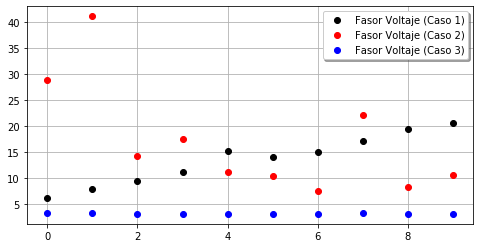

In [16]:
plt.figure(figsize=(8,4))
plt.plot(v1,'ok')
plt.plot(v2,'or')
plt.plot(v3,'ob')
plt.grid(True)
plt.legend(('Fasor Voltaje (Caso 1)','Fasor Voltaje (Caso 2)','Fasor Voltaje (Caso 3)'),shadow=True)
plt.savefig('dat4.pdf')

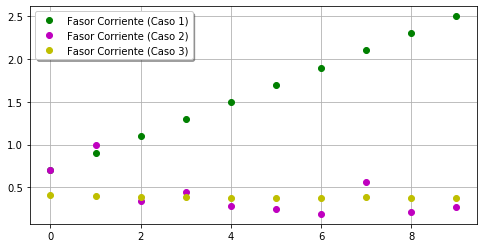

In [15]:
plt.figure(figsize=(8,4))
plt.plot(i1,'og')
plt.plot(i2,'om')
plt.plot(i3,'oy')
plt.grid(True)
plt.legend(('Fasor Corriente (Caso 1)','Fasor Corriente (Caso 2)','Fasor Corriente (Caso 3)'),shadow=True)
plt.savefig('dat5.pdf')